<a href="https://www.kaggle.com/code/utsavagar/data-analyse-on-titanic-data?scriptVersionId=114631054" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


this id my first compition in kaggle _________________ titanic ____________________
**************************************LUCK OR PRIVILEGE********************************************

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport
np.random.seed(0)
# sns.set()
# %config InlineBackend 

importing the data

In [3]:
titanic_data=pd.read_csv('../input/titanic/train.csv',index_col=False)

In [4]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# plt.figure(figsize=(11,6))
# sns.countplot(x='Embarked',hue='Survived',data=data)
# plt.show()

In [6]:
titanic_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


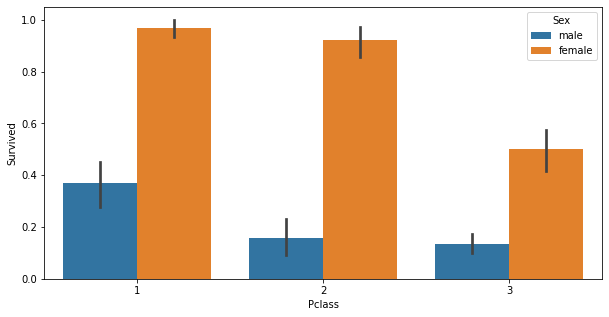

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_data)
plt.show()

In [9]:
titanic_data.groupby(['Sex','Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [10]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic_data.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [12]:
titanic_data.shape

(891, 10)

In [13]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [14]:
titanic_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [15]:
titanic_data.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [16]:
#Ticket feature
titanic_data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [17]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


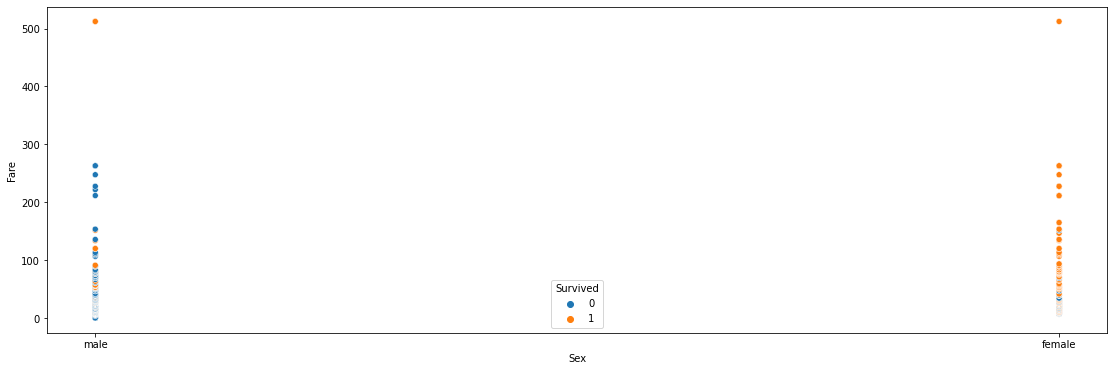

In [18]:
data=titanic_data
data.sort_values('Fare',inplace=True,ascending=True)
plt.figure(figsize=(19,6))
sns.scatterplot(y='Fare',x='Sex',hue='Survived',data=data)
plt.show()

In [19]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S


In [20]:
data.groupby(['Embarked','Sex'])['Survived'].mean()

Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
Name: Survived, dtype: float64

In [21]:
data.groupby(['Sex','Pclass','Survived'])['Fare','Age'].agg('mean')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Fare        Age
Sex    Pclass Survived                       
female 1      0         110.604167  25.666667
              1         105.978159  34.939024
       2      0          18.250000  36.000000
              1          22.288989  28.080882
       3      0          19.773093  23.818182
              1          12.464526  19.329787
male   1      0          62.894910  44.581967
              1          74.637320  36.248000
       2      0          19.488965  33.369048
              1          21.095100  16.022000
       3      0          12.204469  27.255814
              1          15.579696  22.274211

In [22]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 271 to 679
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [25]:
# sns.barplot(x='Embarked',y='Survived',hue='Sex',data=data)
# plt.show()

In [26]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S


In [28]:
ticket= data.groupby(['Survived','Sex'])['Ticket']
print(ticket.describe())
print(ticket.agg(len))


                count unique      top freq
Survived Sex                              
0        female    81     60   347082    5
         male     468    431  3101295    5
1        female   233    188     2666    4
         male     109     98     1601    5
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Ticket, dtype: int64


In [29]:
data.Ticket.unique().shape

(681,)

In [30]:
81+468+233+109

891

In [31]:
60+431+188+98

777

In [32]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 271 to 679
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


many ticket r such thaT THEY r common in mutiple set

In [33]:
# sex_ticket=data.groupby(['Ticket','Survived'])['Sex']#.sort_values(ascending=True)
# sex_ticket.describe()
# # print(sex_ticket)
# # sex_ticket

In [34]:
data.Age.unique()

array([25.  , 49.  , 19.  ,   nan, 40.  , 36.  , 39.  , 38.  , 20.  ,
       33.  , 61.  , 34.5 , 43.  , 18.  , 34.  , 45.  , 27.  , 29.  ,
       24.  , 35.  , 17.  , 51.  , 22.  , 41.  , 15.  , 30.  , 45.5 ,
       13.  , 28.5 , 23.5 , 59.  , 47.  , 20.5 , 21.  , 42.  , 23.  ,
       16.  , 30.5 , 31.  , 40.5 , 65.  , 32.  , 70.5 , 26.  , 74.  ,
       28.  , 14.  , 48.  , 44.  , 37.  , 24.5 , 55.5 , 50.  ,  0.42,
       63.  ,  2.  , 62.  , 57.  , 66.  , 70.  ,  4.  ,  1.  , 12.  ,
        6.  ,  5.  , 52.  , 32.5 , 54.  , 14.5 ,  0.67,  9.  ,  3.  ,
       55.  ,  0.83, 11.  ,  0.75,  8.  , 10.  , 36.5 , 64.  , 46.  ,
        7.  , 60.  , 56.  , 58.  , 80.  , 71.  , 53.  ,  0.92])

In [35]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,S
674,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,S
466,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,S
732,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,S


In [36]:
# sns.barplot(x='Embarked',y='Survived',hue='Sex',data=data)
# plt.show()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 271 to 679
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [37]:
data.describe(include='all')
data_with_embarked=data
data_with_embarked.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,S
674,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
466,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S
732,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,S


In [38]:
data.dropna(how='any',axis=0,inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 271 to 679
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [40]:
# data.loc[data.Ticket=='LINE',:]
# sex_ticket.head()

In [41]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S


In [42]:
data.Age.isnull()
data.Age=data.Age.fillna(data.Age.mean())
data.Age.isnull()
# data.AGE=

271    False
597    False
302    False
263    False
179    False
       ...  
438    False
341    False
737    False
258    False
679    False
Name: Age, Length: 712, dtype: bool

In [43]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,S
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,S
806,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,S
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S
378,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,C
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
326,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,S


In [44]:
data.groupby('Sex').describe()['Fare']

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,259.0,47.332433,61.517487,6.75,13.0000,26.0,56.9646,512.3292
male,453.0,27.268836,45.841889,0.00,7.8958,13.0,28.5000,512.3292


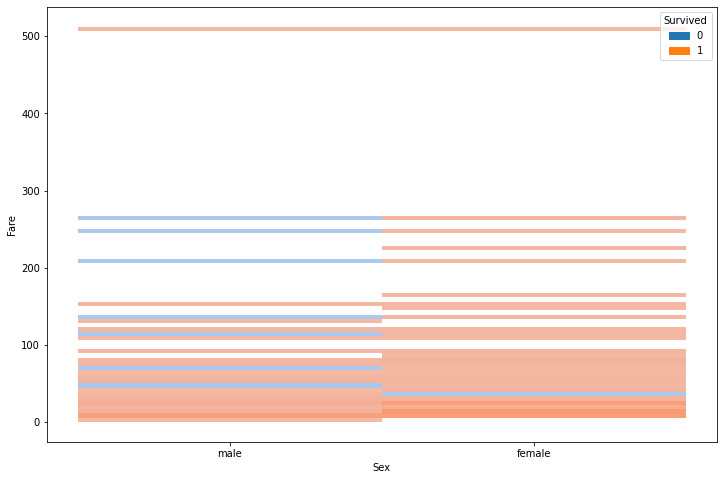

In [45]:
plt.figure(figsize=(12,8))
sns.histplot(data=data,x='Sex',y='Fare',hue='Survived',kde=True)
plt.show()

In [46]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [47]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S


In [48]:
pclass_sex=data.groupby('Sex')['Embarked']#['Pclass']
pclass_sex.value_counts()

Sex     Embarked
female  S           186
        C            61
        Q            12
male    S           368
        C            69
        Q            16
Name: Embarked, dtype: int64

In [49]:
data.groupby(['Embarked','Pclass','Sex'])['Survived','Fare'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Survived        Fare
Embarked Pclass Sex                         
C        1      female  0.973684  117.490900
                male    0.444444   98.488314
         2      female  1.000000   25.268457
                male    0.125000   28.162500
         3      female  0.687500   14.665888
                male    0.280000    9.260512
Q        1      female  1.000000   90.000000
                male    0.000000   90.000000
         2      female  1.000000   12.350000
                male    0.000000   12.350000
         3      female  0.500000   10.601670
                male    0.071429   14.337500
S        1      female  0.954545  101.381345
                male    0.375000   55.466275
         2      female  0.909091   21.744697
                male    0.155556   20.583889
         3      female  0.407895   16.823904
                male    0.140187   12.359458

In [50]:
data.groupby(['Ticket','SibSp','Parch','Embarked','Pclass','Sex','Age'])['Name','Survived','Fare'].describe(include='all').head(30)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Name         \
                                               count unique   
Ticket SibSp Parch Embarked Pclass Sex    Age                 
110152 0     0     S        1      female 16.0     1      1   
                                          30.0     1      1   
                                          33.0     1      1   
110413 0     2     S        1      female 18.0     1      1   
       1     1     S        1      female 39.0     1      1   
                                   male   52.0     1      1   
110465 0     0     S        1      male   47.0     1      1   
110564 0     0     S        1      male   28.0     1      1   
110813 1     0     C        1      female 60.0     1      1   
111240 0     0     S        1      male   61.0     1      1   
111320 0     0     S        1      male   47.0     1      1   
111361 0     1     C        1      female 16.0     1      1   
                                          44.0     1      1   
111369 0     0     C        1      male   26.0     1      1   
111426 0     0     C        1      male   35.0     1      1   
111428 0     0     S        1      male   45.0     1      1   
112050 0     0     S        1      male   39.0     1      1   
112053 0     0     S        1      female 19.0     1      1   
112059 0     0     S        1      male   40.0     1      1   
112277 0     0     C        1      male   40.0     1      1   
113043 0     0     S        1      male   45.5     1      1   
113050 0     0     S        1      male   45.0     1      1   
113051 0     0     C        1      male   30.0     1      1   
113055 0     0     S        1      male   51.0     1      1   
113059 0     0     S        1      male   28.0     1      1   
113501 0     0     S        1      male   29.0     1      1   
113503 0     2     C        1      male   27.0     1      1   
113505 0     1     S        1      female 22.0     1      1   
113509 0     1     C        1      male   65.0     1      1   
113514 0     0     S        1      male   62.0     1      1   

                                                                                                   \
                                                                                              top   
Ticket SibSp Parch Embarked Pclass Sex    Age                                                       
110152 0     0     S        1      female 16.0                              Maioni, Miss. Roberta   
                                          30.0                               Cherry, Miss. Gladys   
                                          33.0  Rothes, the Countess. of (Lucy Noel Martha Dye...   
110413 0     2     S        1      female 18.0                                Taussig, Miss. Ruth   
       1     1     S        1      female 39.0             Taussig, Mrs. Emil (Tillie Mandelbaum)   
                                   male   52.0                                  Taussig, Mr. Emil   
110465 0     0     S        1      male   47.0                     Porter, Mr. Walter Chamberlain   
110564 0     0     S        1      male   28.0          Bjornstrom-Steffansson, Mr. Mauritz Hakan   
110813 1     0     C        1      female 60.0   Warren, Mrs. Frank Manley (Anna Sophia Atkinson)   
111240 0     0     S        1      male   61.0                          Van der hoef, Mr. Wyckoff   
111320 0     0     S        1      male   47.0                                  Gee, Mr. Arthur H   
111361 0     1     C        1      female 16.0                       Hippach, Miss. Jean Gertrude   
                                          44.0    Hippach, Mrs. Louis Albert (Ida Sophia Fischer)   
111369 0     0     C        1      male   26.0                              Behr, Mr. Karl Howell   
111426 0     0     C        1      male   35.0                    Homer, Mr. Harry ("Mr E Haven")   
111428 0     0     S        1      male   45.0      Romaine, Mr. Charles Hallace ("Mr C Rolmane")   
112050 0     0     S        1      male   39.0   

In [51]:
# data['Ticket']=pd.factorize(data['Ticket'])
# ticket_number=pd.factorize(data['Ticket'])[0]
# # data.head()
# ticket_number

In [52]:
# data['Ticket']=ticket_number

In [53]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,S
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,S
806,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,S
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S
378,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,C
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
326,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,S


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 271 to 679
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [55]:
# data['Embarked'],data['Sex']=pd.factorize(data['Embarked'])[0],pd.factorize(data['Sex'])[0]
# data.head(10)

In [56]:
data.Sex.value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 271 to 679
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [58]:
features=['Ticket','SibSp','Parch','Embarked','Pclass','Sex','Age']


In [59]:
titanic_test=pd.read_csv('../input/titanic/test.csv',index_col=False)
titanic_test.head(10)
titanic_test.sort_values(by=['PassengerId'],inplace=True)

In [60]:
# titanic_test.dropna(axis=0,inplace=True)

In [61]:
x_test=titanic_test[features]
x_test

,Ticket,SibSp,Parch,Embarked,Pclass,Sex,Age
0,330911,0,0,Q,3,male,34.5
1,363272,1,0,S,3,female,47.0
2,240276,0,0,Q,2,male,62.0
3,315154,0,0,S,3,male,27.0
4,3101298,1,1,S,3,female,22.0
...,...,...,...,...,...,...,...
413,A.5. 3236,0,0,S,3,male,NaN
414,PC 17758,0,0,C,1,female,39.0
415,SOTON/O.Q. 3101262,0,0,S,3,male,38.5
416,359309,0,0,S,3,male,NaN


In [62]:
y_test=pd.read_csv('../input/titanic/gender_submission.csv')
y_test_survived=y_test['Survived']

In [63]:
y_test.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [64]:
y_test_survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [65]:
x_test.head(10)

,Ticket,SibSp,Parch,Embarked,Pclass,Sex,Age
0,330911,0,0,Q,3,male,34.5
1,363272,1,0,S,3,female,47.0
2,240276,0,0,Q,2,male,62.0
3,315154,0,0,S,3,male,27.0
4,3101298,1,1,S,3,female,22.0
5,7538,0,0,S,3,male,14.0
6,330972,0,0,Q,3,female,30.0
7,248738,1,1,S,2,male,26.0
8,2657,0,0,C,3,female,18.0
9,A/4 48871,2,0,S,3,male,21.0


In [66]:
# x_test['Ticket'],x_test['Sex'],x_test['Embarked']=pd.factorize(x_test['Ticket'])[0],pd.factorize(x_test['Sex'])[0],pd.factorize(x_test['Embarked'])[0]

In [67]:
titanic_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,S
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,S
806,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,S
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S
378,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,C
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
326,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,S


In [68]:
map_Embarked={'C':0,'S':1,'Q':2}
map_sex={'male':0,'female':1}
data['Embarked']=data.Embarked.map(map_Embarked)
data['Sex']=data.Sex.map(map_sex)
data.Ticket=titanic_data.Ticket


In [69]:
x_test.Embarked=x_test.Embarked.map(map_Embarked)
x_test.Sex=x_test.Sex.map(map_sex)
x_test.head(10)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Ticket,SibSp,Parch,Embarked,Pclass,Sex,Age
0,330911,0,0,2,3,0,34.5
1,363272,1,0,1,3,1,47.0
2,240276,0,0,2,2,0,62.0
3,315154,0,0,1,3,0,27.0
4,3101298,1,1,1,3,1,22.0
5,7538,0,0,1,3,0,14.0
6,330972,0,0,2,3,1,30.0
7,248738,1,1,1,2,0,26.0
8,2657,0,0,0,3,1,18.0
9,A/4 48871,2,0,1,3,0,21.0


In [70]:
x_train=data[features]
y_train_survived=data['Survived']
y_train_survived

271    1
597    0
302    0
263    0
179    0
      ..
438    0
341    1
737    1
258    1
679    1
Name: Survived, Length: 712, dtype: int64

In [71]:
# x_train=data[features]

In [72]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0000,1
597,0,3,"Johnson, Mr. Alfred",0,49.0,0,0,LINE,0.0000,1
302,0,3,"Johnson, Mr. William Cahoone Jr",0,19.0,0,0,LINE,0.0000,1
263,0,1,"Harrison, Mr. William",0,40.0,0,0,112059,0.0000,1
179,0,3,"Leonard, Mr. Lionel",0,36.0,0,0,LINE,0.0000,1
806,0,1,"Andrews, Mr. Thomas Jr",0,39.0,0,0,112050,0.0000,1
822,0,1,"Reuchlin, Jonkheer. John George",0,38.0,0,0,19972,0.0000,1
378,0,3,"Betros, Mr. Tannous",0,20.0,0,0,2648,4.0125,0
872,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,1
326,0,3,"Nysveen, Mr. Johan Hansen",0,61.0,0,0,345364,6.2375,1


In [73]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)


In [74]:
# from sklearn.tree import DecisionTreeClassifier
# # model=DecisionTreeClassifier(
# #             criterion = "entropy", random_state = 100,
# #             max_depth = 3, min_samples_leaf = 5)
# model=DecisionTreeClassifier(criterion = "gini",
#             random_state = 100,max_depth=3, min_samples_leaf=5)

In [75]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticket    418 non-null    object 
 1   SibSp     418 non-null    int64  
 2   Parch     418 non-null    int64  
 3   Embarked  418 non-null    int64  
 4   Pclass    418 non-null    int64  
 5   Sex       418 non-null    int64  
 6   Age       332 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 26.1+ KB


In [76]:
x_test.Age.fillna(data.Age.mean(),inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [77]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticket    418 non-null    object 
 1   SibSp     418 non-null    int64  
 2   Parch     418 non-null    int64  
 3   Embarked  418 non-null    int64  
 4   Pclass    418 non-null    int64  
 5   Sex       418 non-null    int64  
 6   Age       418 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 26.1+ KB


In [78]:
ticket_convert=pd.DataFrame(x_train.Ticket.append(x_test.Ticket,ignore_index=True))
# len(ticket_convert)
ticket_convert.Ticket


0                     LINE
1                     LINE
2                     LINE
3                   112059
4                     LINE
               ...        
1125             A.5. 3236
1126              PC 17758
1127    SOTON/O.Q. 3101262
1128                359309
1129                  2668
Name: Ticket, Length: 1130, dtype: object

In [79]:
ticket_convert=pd.factorize(ticket_convert.Ticket)

In [80]:
ticket_convert[0]

array([  0,   0,   0, ..., 804, 805, 806])

In [81]:
x_train_=ticket_convert[0][0:len(x_train)]

In [82]:
# len(x_train.Ticket)
len(x_train_)

712

In [83]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 271 to 679
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticket    712 non-null    object 
 1   SibSp     712 non-null    int64  
 2   Parch     712 non-null    int64  
 3   Embarked  712 non-null    int64  
 4   Pclass    712 non-null    int64  
 5   Sex       712 non-null    int64  
 6   Age       712 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 44.5+ KB


In [84]:
x_test_=ticket_convert[0][len(x_train):]

In [85]:
x_test_
len(x_test_)

418

In [86]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticket    418 non-null    object 
 1   SibSp     418 non-null    int64  
 2   Parch     418 non-null    int64  
 3   Embarked  418 non-null    int64  
 4   Pclass    418 non-null    int64  
 5   Sex       418 non-null    int64  
 6   Age       418 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 26.1+ KB


In [87]:
x_train.Ticket=x_train_
x_test.Ticket=x_test_
print(x_train.head())
print(x_test.head())

     Ticket  SibSp  Parch  Embarked  Pclass  Sex   Age
271       0      0      0         1       3    0  25.0
597       0      0      0         1       3    0  49.0
302       0      0      0         1       3    0  19.0
263       1      0      0         1       1    0  40.0
179       0      0      0         1       3    0  36.0
   Ticket  SibSp  Parch  Embarked  Pclass  Sex   Age
0     541      0      0         2       3    0  34.5
1     542      1      0         1       3    1  47.0
2     543      0      0         2       2    0  62.0
3     544      0      0         1       3    0  27.0
4     266      1      1         1       3    1  22.0


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [88]:
y_train_survived

271    1
597    0
302    0
263    0
179    0
      ..
438    0
341    1
737    1
258    1
679    1
Name: Survived, Length: 712, dtype: int64

In [89]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 271 to 679
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticket    712 non-null    int64  
 1   SibSp     712 non-null    int64  
 2   Parch     712 non-null    int64  
 3   Embarked  712 non-null    int64  
 4   Pclass    712 non-null    int64  
 5   Sex       712 non-null    int64  
 6   Age       712 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 44.5 KB


In [90]:
len(x_train)

712

In [91]:
len(y_train_survived)

712

In [92]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticket    418 non-null    int64  
 1   SibSp     418 non-null    int64  
 2   Parch     418 non-null    int64  
 3   Embarked  418 non-null    int64  
 4   Pclass    418 non-null    int64  
 5   Sex       418 non-null    int64  
 6   Age       418 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 26.1 KB


In [93]:
# x_test.isnull()
# x_test.dropna(inplace=True,axis=0)

In [94]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticket    418 non-null    int64  
 1   SibSp     418 non-null    int64  
 2   Parch     418 non-null    int64  
 3   Embarked  418 non-null    int64  
 4   Pclass    418 non-null    int64  
 5   Sex       418 non-null    int64  
 6   Age       418 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 26.1 KB


In [95]:
model.fit(x_train,y_train_survived)
y_model=model.predict(x_test)
y_model

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,

In [96]:
y_prob=model.predict_proba(x_test)
# y_prob

In [97]:
from sklearn.metrics import accuracy_score


In [98]:
y_test_survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [99]:
accuracy_score(y_test_survived,y_model)

0.7535885167464115

In [100]:
x_test.head(20)

,Ticket,SibSp,Parch,Embarked,Pclass,Sex,Age
0,541,0,0,2,3,0,34.500000
1,542,1,0,1,3,1,47.000000
2,543,0,0,2,2,0,62.000000
3,544,0,0,1,3,0,27.000000
4,266,1,1,1,3,1,22.000000
5,545,0,0,1,3,0,14.000000
6,546,0,0,2,3,1,30.000000
7,427,1,1,1,2,0,26.000000
8,547,0,0,0,3,1,18.000000
9,374,2,0,1,3,0,21.000000


In [101]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
survived_={'PassengerId':titanic_test.PassengerId,'Survived':y_model}

In [103]:
submition=pd.DataFrame(data=survived_)
submition

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,1
416,1308,0


In [104]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,1,3,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0000,1
597,0,3,"Johnson, Mr. Alfred",0,49.0,0,0,LINE,0.0000,1
302,0,3,"Johnson, Mr. William Cahoone Jr",0,19.0,0,0,LINE,0.0000,1
263,0,1,"Harrison, Mr. William",0,40.0,0,0,112059,0.0000,1
179,0,3,"Leonard, Mr. Lionel",0,36.0,0,0,LINE,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
438,0,1,"Fortune, Mr. Mark",0,64.0,1,4,19950,263.0000,1
341,1,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0000,1
737,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,0
258,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,0


In [105]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


presion recall f1m score

In [106]:
from sklearn.metrics import precision_score
precision=precision_score(y_test_survived,y_model,average='binary')
precision

0.6432748538011696

In [107]:
from sklearn.metrics import recall_score
recall=recall_score(y_test_survived,y_model,average='binary')
recall

0.7236842105263158

In [108]:
f1m=(2*(precision*recall)/(precision+recall))

In [109]:
f1m

0.6811145510835913

In [110]:
# decision tree-
# ()
# precision=.400933962264151
# recall=.5592105263157895
# f1m score= 0.467032967032967
# Accuracy = 0.5358851674641149
# (entropy)
# precision=0.9029126213592233
# recall=0.6118421052631579
# f1m score= 0.7294117647058823
# Accuracy = 0.8349282296650717
# (gini index)
# precision=0.9393939393939394
# recall= 0.6118421052631579
# f1m score= 0.7410358565737052
# Accuracy = 0.8444976076555024
# random forrest-
# precision=0.6432748538011696
# recall= 0.7236842105263158
# f1m score= 0.6811145510835913
# Accuracy=0.7535885167464115
